In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

import math
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23

datas_full = ['mini_test', 'tiered_test', "places", "plantae", "cars", "cub", 'crop','euro', 'isic', 'chest']
datas_fullname = ['miniIN','tieredIN','Places','Plantae', 'Cars', 'CUB', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']
backbone = ['18', '34', '50', '101', '152']
cdfsl = ['mini_test','crop', 'euro', 'isic', 'chest']
noncdfsl = ["places", "plantae", "cars", "cub", 'tiered_test']


import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['Times New Roman']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [2]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties().get_name()]

['Times New Roman']

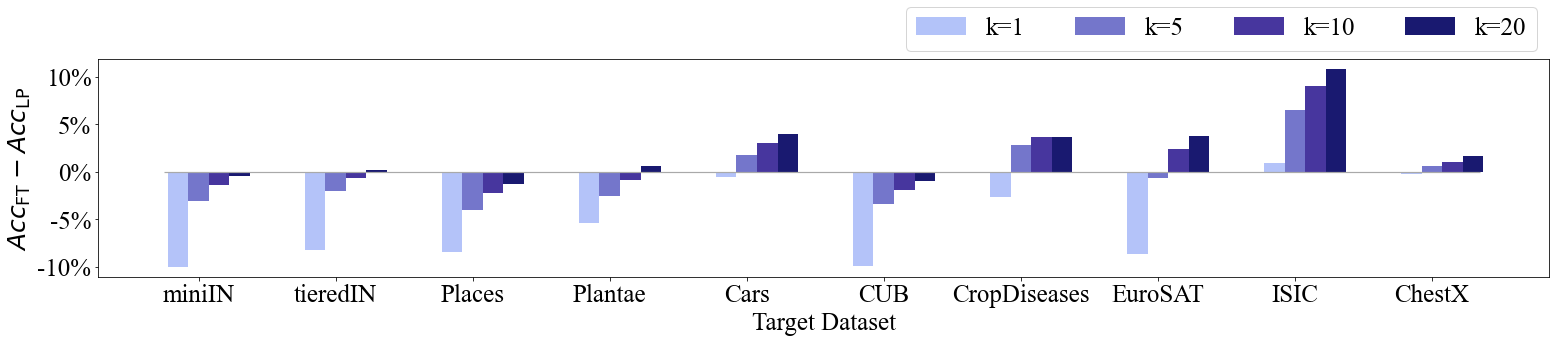

In [26]:
# 채도 줄이기 0선 그리기
result_f = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars', 'cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_f.index:
    for bs in result_f.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_f.loc[data][bs] = acc

result_h = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars', 'cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_h.index:
    for bs in result_h.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_h.loc[data][bs] = acc
        
result = result_f - result_h


shot_lst = ['01shot', '05shot', '20shot']

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(26,4))
bar_width = 0.15

# target datasets
index = np.arange(10)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '01shot'].values.astype('float'), bar_width, alpha=0.8, color='#a1b5f8', label='k=1')

b2 = plt.bar(index + bar_width, result.loc[:, '05shot'].values.astype('float'), bar_width, alpha=1.0, color='#7476cb', label='k=5')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '10shot'].values.astype('float'), bar_width, alpha=1.0, color='#47369e', label='k=10')

b4 = plt.bar(index + 3*bar_width, result.loc[:, '20shot'].values.astype('float'), bar_width, alpha=1, color='midnightblue', label='k=20')

plt.hlines(y=0, xmin=-0.1, xmax=9.5, color='darkgray', linewidth=1.2) # 0축 

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0, 10 + bar_width, 1), ['miniIN', 'tieredIN', 'Places', 'Plantae', 'Cars', 'CUB', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX'], size = 25)
plt.yticks(np.arange(-10, 11, 5), ["-10%", "-5%", "0%", "5%", "10%"], size = 25)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 25)
plt.ylabel('$Acc_{\sf FT}-Acc_{\sf LP}$', size = 25)
#plt.ylim([0, 20])
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.3), fontsize = 25, ncol=4)
plt.savefig('./img_pdf/why_full/why_full2_tiered.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [ ]:
/logs/baseline/output/resnet10_simclr_LS_default/plantae/05way_005shot_full_default/augmentation/randomhorizontalflip_fixed/test_history.csv

In [ ]:
./logs/baseline/output/resnet10_simclr_LS_default/chest/05way_020shot_full_default/manifold_mixup/same/test_history.csv

In [41]:
result = pd.DataFrame(None, index=datas_full, columns=['10shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/randomcoloredjitter/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = r"{:.2f} ± {:.2f}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = acc
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        print(wrt, end=" & ")
    print()
display(result)

ValueError: cannot convert float NaN to integer

In [93]:
result = pd.DataFrame(None, index=datas_full, columns=['10shot'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/base/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        print(wrt, end=" & ")
display(result)

81.30{\scriptsize$\pm$.53} & 78.88{\scriptsize$\pm$.66} & 76.46{\scriptsize$\pm$.60} & 65.04{\scriptsize$\pm$.78} & 62.07{\scriptsize$\pm$.67} & 70.79{\scriptsize$\pm$.68} & 95.74{\scriptsize$\pm$.31} & 87.43{\scriptsize$\pm$.45} & 54.74{\scriptsize$\pm$.62} & 30.78{\scriptsize$\pm$.44} & 

,10shot
mini_test,81.30 ± 0.54
tiered_test,78.88 ± 0.66
places,76.46 ± 0.60
plantae,65.04 ± 0.79
cars,62.07 ± 0.68
cub,70.79 ± 0.69
crop,95.74 ± 0.32
euro,87.43 ± 0.45
isic,54.74 ± 0.63
chest,30.78 ± 0.45


### Baseline

In [7]:
result = pd.DataFrame(None, index=datas_full, columns=['01shot', '05shot', '10shot', '20shot'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
display(result.T)
print()
result = pd.DataFrame(None, index= datas_full, columns=['01shot', '05shot', '10shot', '20shot'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        
        result.loc[data][types] = acc
display(result.T)

,mini_test,tiered_test,places,plantae,cars,cub,crop,euro,isic,chest
01shot,56.47 ± 0.80,55.89 ± 0.96,52.23 ± 0.80,36.87 ± 0.67,29.84 ± 0.54,40.42 ± 0.76,73.12 ± 0.88,64.72 ± 0.88,29.39 ± 0.53,22.56 ± 0.40
05shot,77.95 ± 0.61,74.79 ± 0.76,73.01 ± 0.67,53.85 ± 0.74,44.64 ± 0.67,57.51 ± 0.79,91.50 ± 0.49,84.08 ± 0.60,40.39 ± 0.55,26.56 ± 0.43
10shot,83.06 ± 0.52,79.80 ± 0.68,78.47 ± 0.60,60.84 ± 0.74,52.58 ± 0.69,65.31 ± 0.75,94.56 ± 0.38,88.62 ± 0.48,45.38 ± 0.54,28.88 ± 0.43
20shot,86.64 ± 0.43,83.27 ± 0.60,81.90 ± 0.52,66.65 ± 0.72,60.98 ± 0.67,71.00 ± 0.71,96.20 ± 0.29,91.17 ± 0.39,50.89 ± 0.54,31.16 ± 0.44


,mini_test,tiered_test,places,plantae,cars,cub,crop,euro,isic,chest
01shot,49.71 ± 0.78,49.10 ± 0.90,45.44 ± 0.79,33.35 ± 0.59,29.49 ± 0.54,37.54 ± 0.71,67.10 ± 0.91,56.39 ± 0.86,30.71 ± 0.56,24.00 ± 0.44
05shot,75.88 ± 0.64,73.60 ± 0.78,70.05 ± 0.71,53.19 ± 0.73,49.26 ± 0.70,59.35 ± 0.80,92.06 ± 0.51,82.68 ± 0.60,48.25 ± 0.64,26.35 ± 0.42
10shot,82.46 ± 0.52,80.23 ± 0.66,76.88 ± 0.63,61.81 ± 0.77,60.07 ± 0.69,68.68 ± 0.74,95.75 ± 0.34,88.87 ± 0.45,56.11 ± 0.61,29.53 ± 0.44
20shot,87.25 ± 0.42,84.40 ± 0.58,81.88 ± 0.53,69.35 ± 0.71,71.10 ± 0.65,76.08 ± 0.69,97.69 ± 0.23,92.62 ± 0.35,62.38 ± 0.60,32.69 ± 0.45


In [85]:
result = pd.DataFrame(None, index=datas_full, columns=['01shot', '05shot', '10shot', '20shot'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
        if types == '10shot':
            wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                     math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
            print(wrt, end=" & ")
display(result.T)
print()
result = pd.DataFrame(None, index=datas_full, columns=['01shot', '05shot', '10shot', '20shot'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_full_default/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
        if types == '10shot':
            wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                     math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
            print(wrt, end=" & ")
display(result.T)

87.06{\scriptsize$\pm$.41} & 83.14{\scriptsize$\pm$.62} & 77.33{\scriptsize$\pm$.60} & 61.03{\scriptsize$\pm$.81} & 52.92{\scriptsize$\pm$.69} & 82.06{\scriptsize$\pm$.67} & 90.42{\scriptsize$\pm$.48} & 83.97{\scriptsize$\pm$.55} & 46.15{\scriptsize$\pm$.53} & 26.80{\scriptsize$\pm$.43} & 

,mini_test,tiered_test,places,plantae,cars,cub,crop,euro,isic,chest
01shot,63.37 ± 0.80,61.03 ± 0.93,52.10 ± 0.87,38.51 ± 0.74,31.25 ± 0.61,58.00 ± 0.94,66.24 ± 0.90,61.91 ± 0.88,30.38 ± 0.58,22.29 ± 0.39
05shot,82.92 ± 0.52,78.97 ± 0.69,72.41 ± 0.69,55.08 ± 0.82,45.76 ± 0.67,76.91 ± 0.79,86.82 ± 0.59,79.72 ± 0.68,41.58 ± 0.54,24.96 ± 0.44
10shot,87.06 ± 0.41,83.14 ± 0.63,77.33 ± 0.60,61.03 ± 0.81,52.92 ± 0.69,82.06 ± 0.68,90.42 ± 0.49,83.97 ± 0.55,46.15 ± 0.53,26.80 ± 0.43
20shot,89.31 ± 0.36,85.64 ± 0.56,81.00 ± 0.53,65.46 ± 0.77,59.11 ± 0.67,85.10 ± 0.59,92.77 ± 0.40,86.50 ± 0.49,49.98 ± 0.51,28.62 ± 0.40



85.70{\scriptsize$\pm$.43} & 82.44{\scriptsize$\pm$.64} & 75.07{\scriptsize$\pm$.65} & 60.12{\scriptsize$\pm$.79} & 55.92{\scriptsize$\pm$.71} & 80.11{\scriptsize$\pm$.68} & 94.13{\scriptsize$\pm$.38} & 86.36{\scriptsize$\pm$.50} & 55.20{\scriptsize$\pm$.62} & 27.83{\scriptsize$\pm$.41} & 

,mini_test,tiered_test,places,plantae,cars,cub,crop,euro,isic,chest
01shot,53.34 ± 0.82,52.76 ± 0.88,43.66 ± 0.76,33.06 ± 0.63,30.64 ± 0.59,48.12 ± 0.80,63.60 ± 0.84,53.25 ± 0.82,31.28 ± 0.59,22.08 ± 0.39
05shot,79.83 ± 0.54,76.98 ± 0.70,68.43 ± 0.74,52.50 ± 0.80,47.58 ± 0.67,73.50 ± 0.79,89.68 ± 0.53,79.09 ± 0.63,48.08 ± 0.64,25.58 ± 0.44
10shot,85.70 ± 0.44,82.44 ± 0.65,75.07 ± 0.65,60.12 ± 0.80,55.92 ± 0.71,80.11 ± 0.68,94.13 ± 0.38,86.36 ± 0.50,55.20 ± 0.63,27.83 ± 0.42
20shot,88.92 ± 0.38,85.85 ± 0.55,79.71 ± 0.57,66.08 ± 0.79,63.04 ± 0.70,84.11 ± 0.62,96.45 ± 0.28,90.24 ± 0.42,60.78 ± 0.60,30.26 ± 0.45


In [185]:
result_f.iloc[4][1]

28.000000119209282

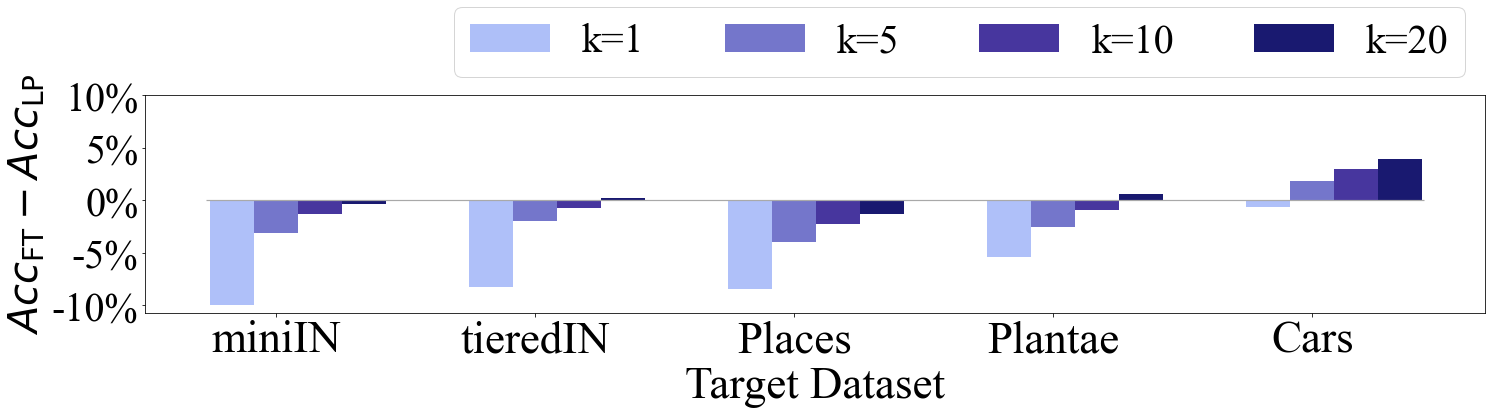

In [27]:
# 채도 줄이기 0선 그리기
result_f = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_f.index:
    for bs in result_f.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_f.loc[data][bs] = acc

result_h = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_h.index:
    for bs in result_h.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_h.loc[data][bs] = acc
        
result = result_f - result_h


shot_lst = ['01shot', '05shot', '10shot', '20shot']

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(24,4))
bar_width = 0.17

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '01shot'].values.astype('float'), bar_width, alpha=0.85, color='#a1b5f8', label='k=1')

b2 = plt.bar(index + bar_width, result.loc[:, '05shot'].values.astype('float'), bar_width, alpha=1, color='#7476cb', label='k=5')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '10shot'].values.astype('float'), bar_width, alpha=1, color='#47369e', label='k=10')

b4 = plt.bar(index + 3*bar_width, result.loc[:, '20shot'].values.astype('float'), bar_width, alpha=1, color='midnightblue', label='k=20')

plt.hlines(y=0, xmin=-0.1, xmax=4.6, color='darkgray', linewidth=1.2) # 0축 

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0, 5 + bar_width, 1), ['miniIN', 'tieredIN', 'Places', 'Plantae', 'Cars'], size = 45)
plt.yticks(np.arange(-10, 11, 5), ["-10%", "-5%", "0%", "5%", "10%"], size = 40)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 45)
plt.ylabel('$Acc_{\sf FT}-Acc_{\sf LP}$', size = 40)
#plt.ylim([0, 20])
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.5), fontsize = 40, ncol=4)
plt.savefig('./img_pdf/why_full/why_full1_tiered.pdf', bbox_inches='tight', format='pdf')
plt.show()

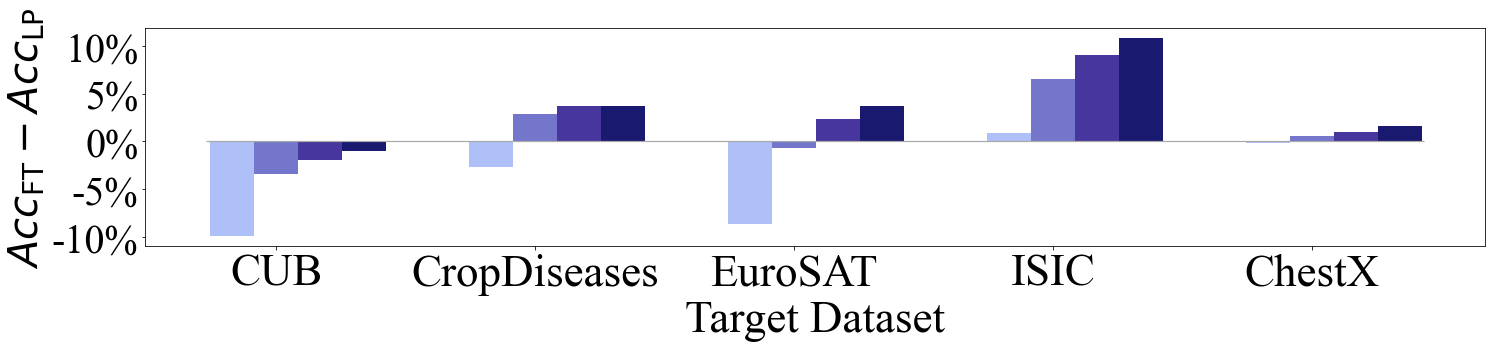

In [28]:
# 채도 줄이기 0선 그리기
result_f = pd.DataFrame(None, index=['cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_f.index:
    for bs in result_f.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_f.loc[data][bs] = acc

result_h = pd.DataFrame(None, index=['cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_h.index:
    for bs in result_h.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_h.loc[data][bs] = acc
        
result = result_f - result_h


shot_lst = ['01shot', '05shot', '10shot', '20shot']

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(24,4))
bar_width = 0.17

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '01shot'].values.astype('float'), bar_width, alpha=0.85, color='#a1b5f8', label='k=1')

b2 = plt.bar(index + bar_width, result.loc[:, '05shot'].values.astype('float'), bar_width, alpha=1, color='#7476cb', label='k=5')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '10shot'].values.astype('float'), bar_width, alpha=1, color='#47369e', label='k=10')

b4 = plt.bar(index + 3*bar_width, result.loc[:, '20shot'].values.astype('float'), bar_width, alpha=1, color='midnightblue', label='k=20')

plt.hlines(y=0, xmin=-0.1, xmax=4.6, color='darkgray', linewidth=1.2) # 0축 

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0, 5 + bar_width, 1), ['CUB', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX'], size = 45)
plt.yticks(np.arange(-10, 11, 5), ["-10%", "-5%", "0%", "5%", "10%"], size = 40)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 45)
plt.ylabel('$Acc_{\sf FT}-Acc_{\sf LP}$', size = 40)
#plt.ylim([0, 20])
#plt.legend(loc='upper right', bbox_to_anchor=(1, 1.5), fontsize = 40, ncol=4)
plt.savefig('./img_pdf/why_full/why_full2_tiered.pdf', bbox_inches='tight', format='pdf')
plt.show()

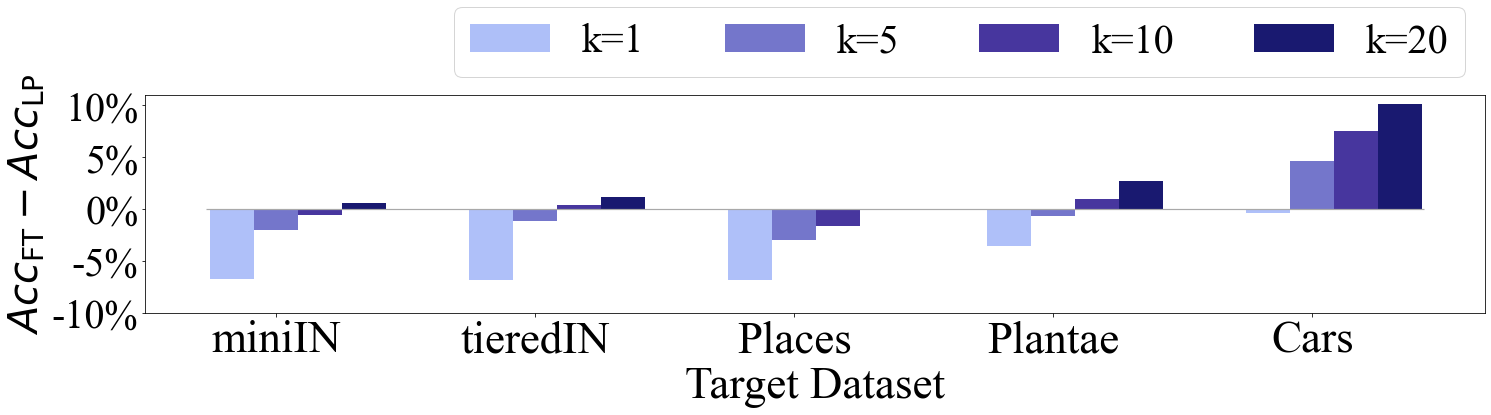

In [29]:
# 채도 줄이기 0선 그리기
result_f = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_f.index:
    for bs in result_f.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_f.loc[data][bs] = acc

result_h = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_h.index:
    for bs in result_h.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_h.loc[data][bs] = acc
        
result = result_f - result_h


shot_lst = ['01shot', '05shot', '10shot', '20shot']

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(24,4))
bar_width = 0.17

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '01shot'].values.astype('float'), bar_width, alpha=0.85, color='#a1b5f8', label='k=1')

b2 = plt.bar(index + bar_width, result.loc[:, '05shot'].values.astype('float'), bar_width, alpha=1, color='#7476cb', label='k=5')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '10shot'].values.astype('float'), bar_width, alpha=1, color='#47369e', label='k=10')

b4 = plt.bar(index + 3*bar_width, result.loc[:, '20shot'].values.astype('float'), bar_width, alpha=1, color='midnightblue', label='k=20')

plt.hlines(y=0, xmin=-0.1, xmax=4.6, color='darkgray', linewidth=1.2) # 0축 

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0, 5 + bar_width, 1), ['miniIN', 'tieredIN', 'Places', 'Plantae', 'Cars'], size = 45)
plt.yticks(np.arange(-10, 11, 5), ["-10%", "-5%", "0%", "5%", "10%"], size = 40)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 45)
plt.ylabel('$Acc_{\sf FT}-Acc_{\sf LP}$', size = 40)
#plt.ylim([0, 20])
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.5), fontsize = 40, ncol=4)
plt.savefig('./img_pdf/why_full/why_full1_main.pdf', bbox_inches='tight', format='pdf')
plt.show()

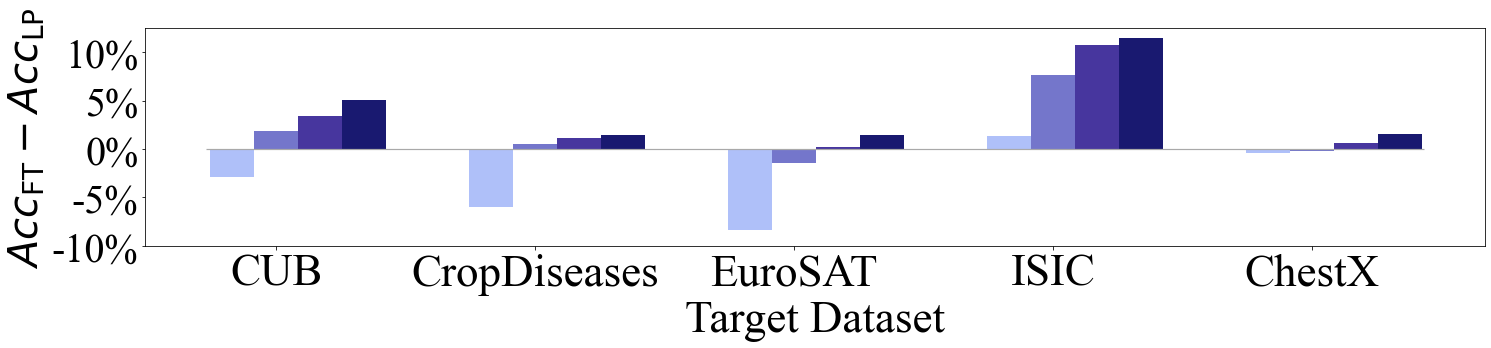

In [30]:
# 채도 줄이기 0선 그리기
result_f = pd.DataFrame(None, index=['cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_f.index:
    for bs in result_f.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_f.loc[data][bs] = acc

result_h = pd.DataFrame(None, index=['cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '10shot', '20shot'])
for data in result_h.index:
    for bs in result_h.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_h.loc[data][bs] = acc
        
result = result_f - result_h


shot_lst = ['01shot', '05shot', '10shot', '20shot']

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(24,4))
bar_width = 0.17

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '01shot'].values.astype('float'), bar_width, alpha=0.85, color='#a1b5f8', label='k=1')

b2 = plt.bar(index + bar_width, result.loc[:, '05shot'].values.astype('float'), bar_width, alpha=1, color='#7476cb', label='k=5')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '10shot'].values.astype('float'), bar_width, alpha=1, color='#47369e', label='k=10')

b4 = plt.bar(index + 3*bar_width, result.loc[:, '20shot'].values.astype('float'), bar_width, alpha=1, color='midnightblue', label='k=20')

plt.hlines(y=0, xmin=-0.1, xmax=4.6, color='darkgray', linewidth=1.2) # 0축 

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0, 5 + bar_width, 1), ['CUB', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX'], size = 45)
plt.yticks(np.arange(-10, 11, 5), ["-10%", "-5%", "0%", "5%", "10%"], size = 40)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 45)
plt.ylabel('$Acc_{\sf FT}-Acc_{\sf LP}$', size = 40)
#plt.ylim([0, 20])
#plt.legend(loc='upper right', bbox_to_anchor=(1, 1.5), fontsize = 40, ncol=4)
plt.savefig('./img_pdf/why_full/why_full2_main.pdf', bbox_inches='tight', format='pdf')
plt.show()

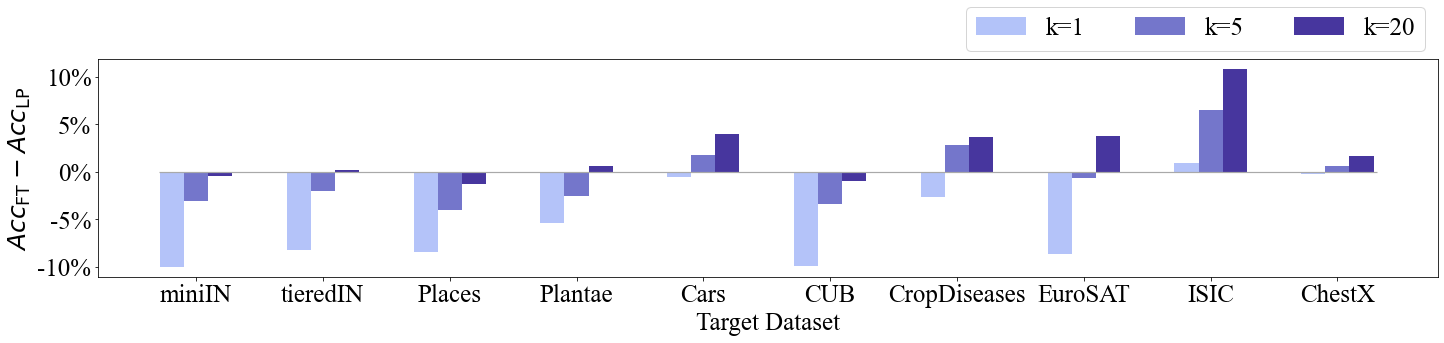

In [4]:
# 채도 줄이기 0선 그리기
result_f = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars', 'cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '20shot'])
for data in result_f.index:
    for bs in result_f.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_full_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_f.loc[data][bs] = acc

result_h = pd.DataFrame(None, index=['mini_test', 'tiered_test', 'places', 'plantae', 'cars', 'cub', 'crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '20shot'])
for data in result_h.index:
    for bs in result_h.columns:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result_h.loc[data][bs] = acc
        
result = result_f - result_h


shot_lst = ['01shot', '05shot', '20shot']

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(24,4))
bar_width = 0.19

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(10)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '01shot'].values.astype('float'), bar_width, alpha=0.8, color='#a1b5f8', label='k=1')

b2 = plt.bar(index + bar_width, result.loc[:, '05shot'].values.astype('float'), bar_width, alpha=1.0, color='#7476cb', label='k=5')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '20shot'].values.astype('float'), bar_width, alpha=1, color='#47369e', label='k=20')

plt.hlines(y=0, xmin=-0.1, xmax=9.5, color='darkgray', linewidth=1.2) # 0축 

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width+0, 10 + bar_width, 1), ['miniIN', 'tieredIN', 'Places', 'Plantae', 'Cars', 'CUB', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX'], size = 25)
plt.yticks(np.arange(-10, 11, 5), ["-10%", "-5%", "0%", "5%", "10%"], size = 25)

# x축, y축 이름 및 범례 설정
plt.xlabel('Target Dataset', size = 25)
plt.ylabel('$Acc_{\sf FT}-Acc_{\sf LP}$', size = 25)
#plt.ylim([0, 20])
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.3), fontsize = 25, ncol=3)
plt.savefig('./img_pdf/why_full/why_full2_tiered.pdf', bbox_inches='tight', format='pdf')
plt.show()

In [64]:
result = pd.DataFrame(None, index=datas_full, columns=[ '10shot'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/cutmix/both/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
display(result)

,10shot
mini_test,80.89 ± 0.55
tiered_test,78.48 ± 0.70
places,76.16 ± 0.62
plantae,60.94 ± 0.72
cars,58.98 ± 0.70
cub,64.78 ± 0.77
crop,95.56 ± 0.35
euro,88.64 ± 0.45
isic,52.60 ± 0.58
chest,29.21 ± 0.43


In [ ]:
CD-FSL/logs/baseline/output/resnet18_base_LS_default/mini_test/05way_001shot_full_default/test_history.csv

In [37]:
result = pd.DataFrame(None, index=datas, columns=['same', 'diff'])
for data in result.index:
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/{}/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                                 1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][types] = acc
result

,same,diff
mini_test,75.00 ± 0.63,73.86 ± 0.66
crop,92.41 ± 0.49,92.05 ± 0.51
euro,82.81 ± 0.58,83.18 ± 0.60
isic,48.32 ± 0.61,45.17 ± 0.58
chest,25.93 ± 0.39,26.33 ± 0.44


In [18]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/cutmix/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,56.04 ± 0.85,75.20 ± 0.65
crop,46.81 ± 1.11,56.67 ± 1.28
euro,47.70 ± 0.78,60.85 ± 0.86
isic,25.99 ± 0.48,30.50 ± 0.53
chest,21.39 ± 0.31,22.82 ± 0.34


In [33]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/augmentation/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_randomhorizontalflip.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,49.45 ± 0.78,76.25 ± 0.62
crop,68.45 ± 0.91,93.08 ± 0.46
euro,58.37 ± 0.82,83.77 ± 0.58
isic,31.36 ± 0.56,49.80 ± 0.63
chest,22.20 ± 0.38,26.18 ± 0.42


In [87]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}_full_no_pretrain/augmentation/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_randomhorizontalflip.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,29.26 ± 0.56,40.70 ± 0.68
crop,52.90 ± 0.87,78.22 ± 0.74
euro,43.09 ± 0.87,54.80 ± 0.83
isic,27.03 ± 0.56,39.43 ± 0.61
chest,21.18 ± 0.37,22.69 ± 0.39


In [149]:
bs = 5

# pretrain
pretrain = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}shot_full_default/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    pretrain.append(acc)

# pretrain_flip
pretrain_flip = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}shot_full_default/augmentation/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history_old_randomhorizontalflip.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    pretrain_flip.append(acc)

# pretrain_cutmix
pretrain_cutmix = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}shot_full_default/cutmix/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    pretrain_cutmix.append(acc)
    
# no pretrain
no_pretrain = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}shot_full_no_pretrain/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    no_pretrain.append(acc)

# no pretrain + flip
no_pretrain_flip = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}shot_full_no_pretrain/augmentation/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history_randomhorizontalflip.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    no_pretrain_flip.append(acc)

# no pretrain + cutmix
no_pretrain_cutmix = []
for data in datas:
    path = "./logs/baseline/output/resnet10_simclr_LS_no_pretrain/{}/05way_00{}shot_full_no_pretrain/cutmix/".format(data, bs)
    test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
    acc = test_acc.mean()[-1] * 100
    no_pretrain_cutmix.append(acc)

### Full

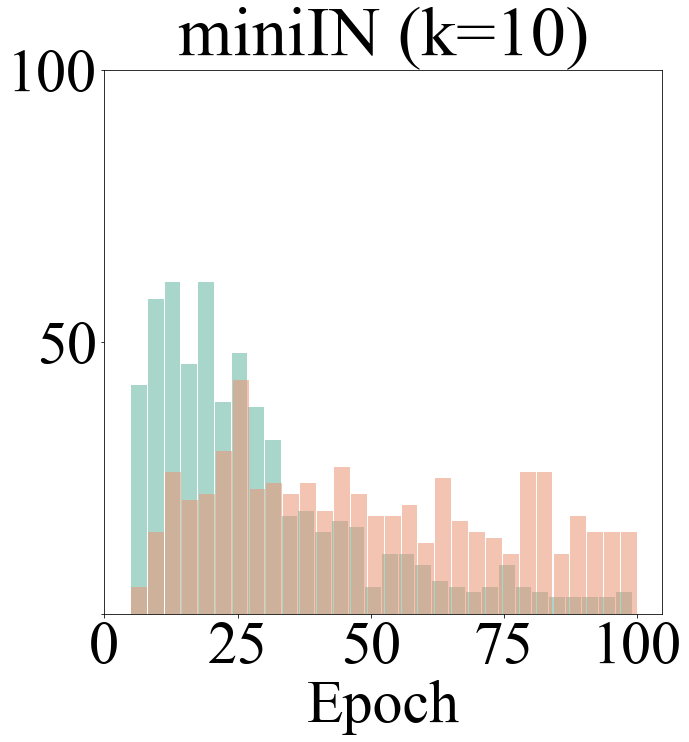

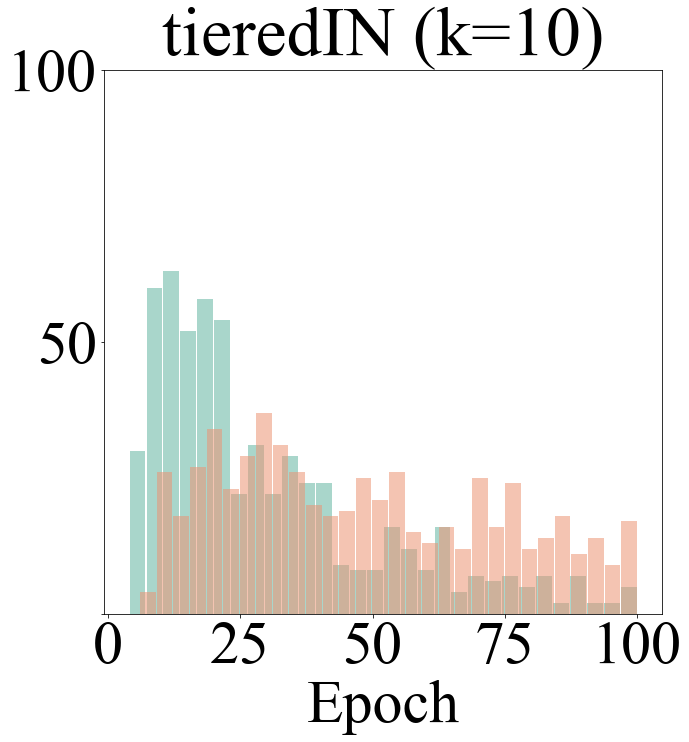

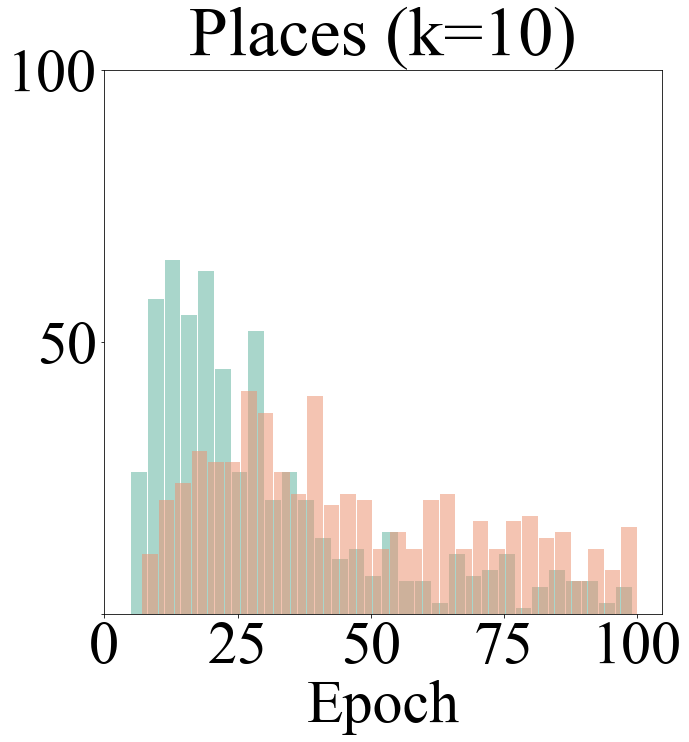

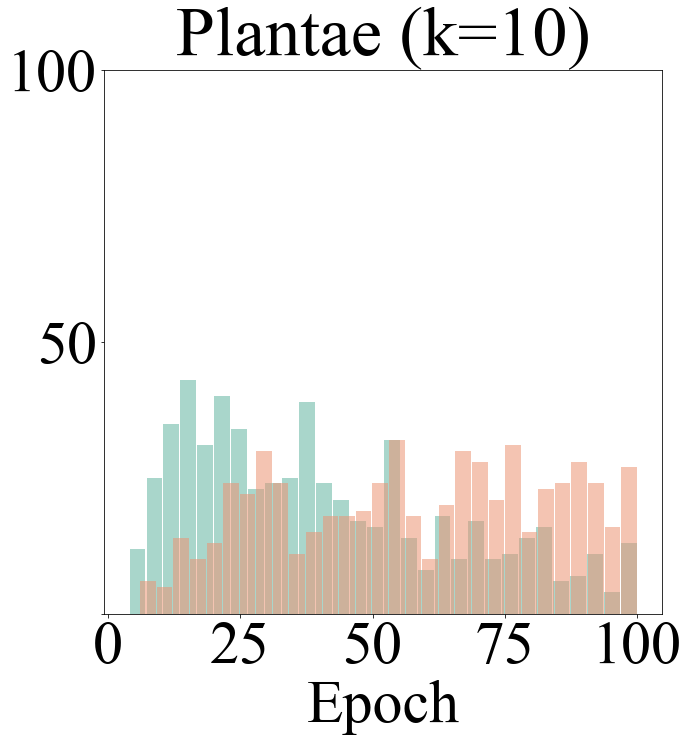

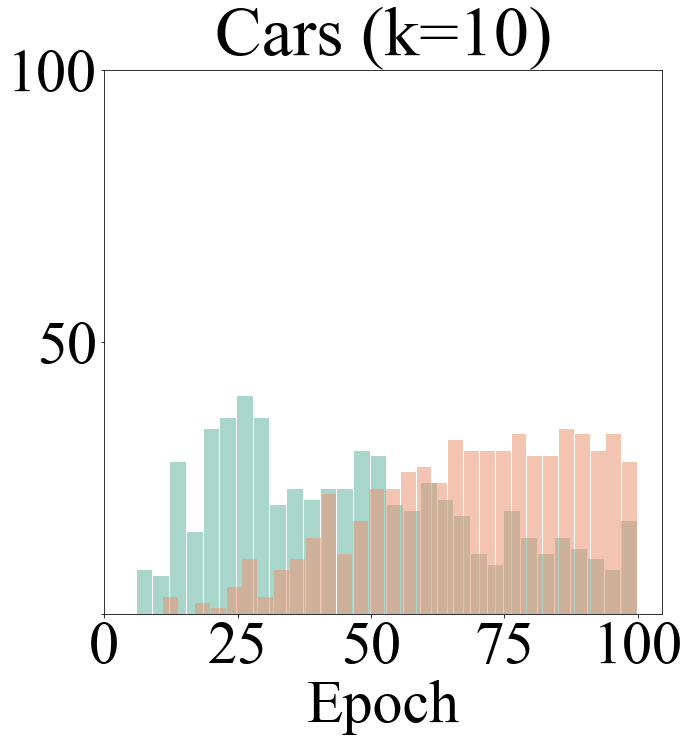

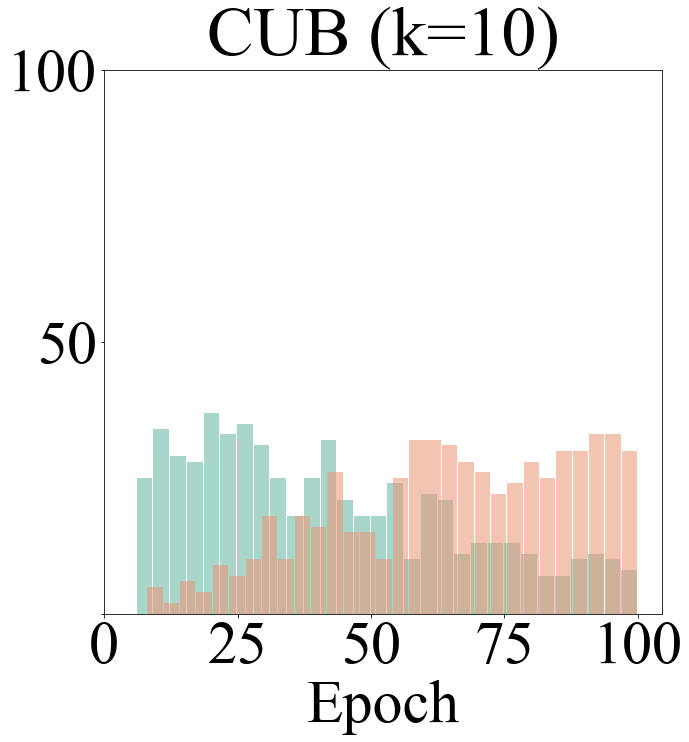

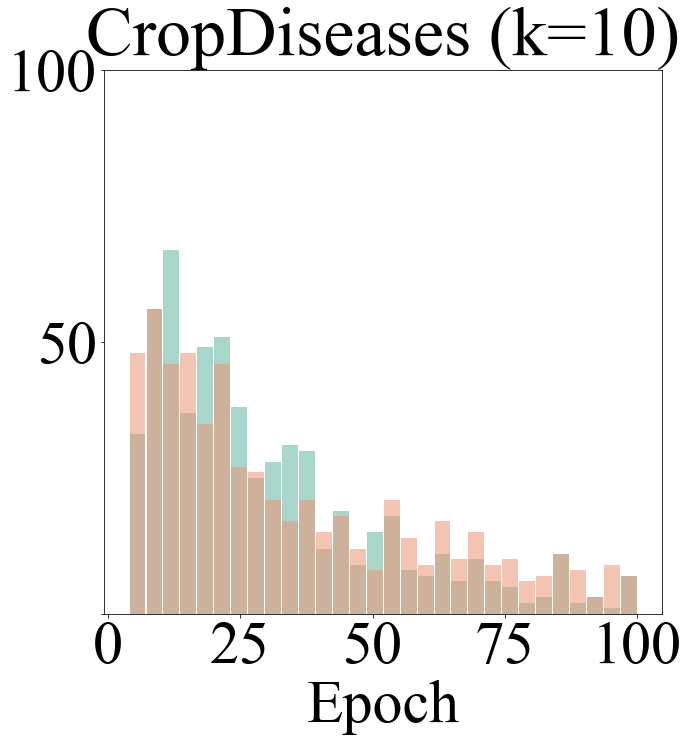

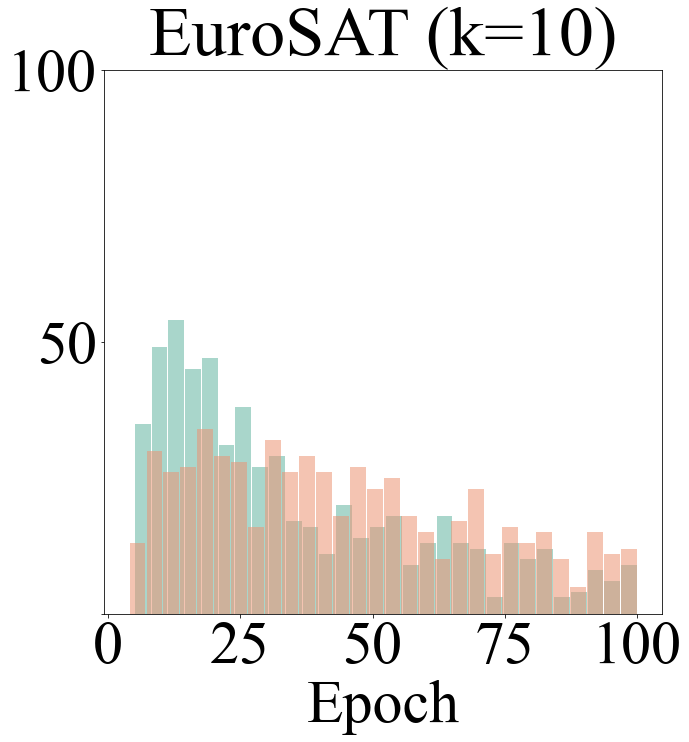

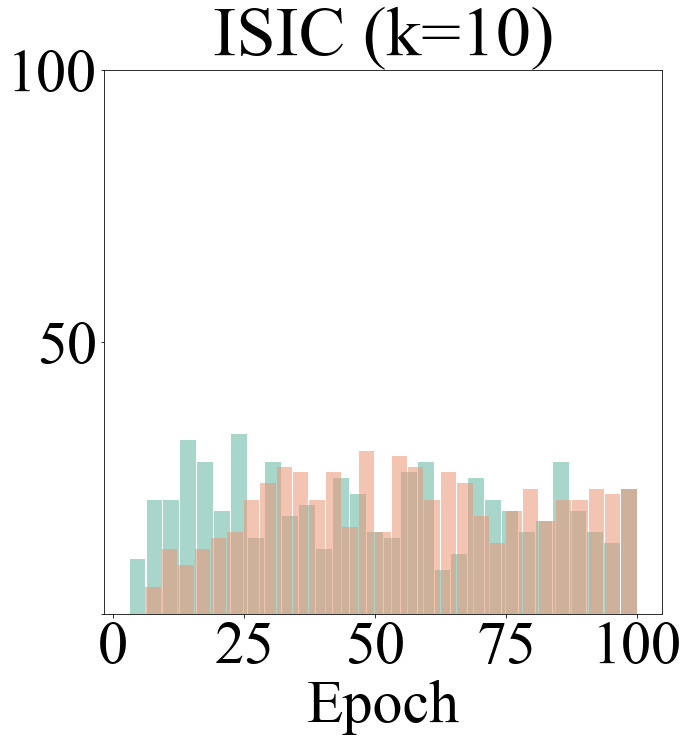

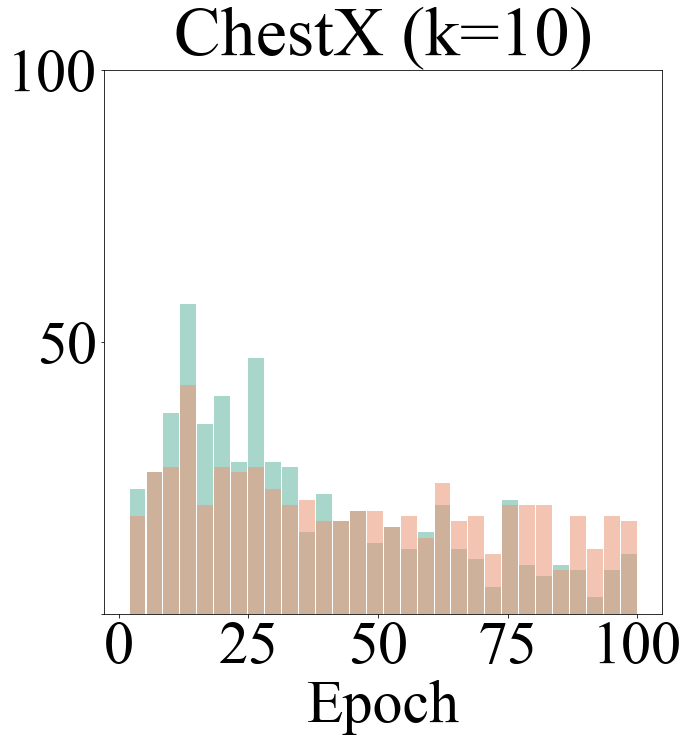

In [42]:
for idx, data in enumerate(datas_full):
    for shot in ['10']:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}shot_head_default/".format(data, shot)
        path_f = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}shot_full_default/".format(data, shot)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        test_acc_f = pd.read_csv(path_f+"test_history.csv", index_col='Unnamed: 0')
        best = []
        best_f = []
        for i in range(600):
            episode = test_acc.iloc[i,:][1:]
            mx = episode.max()
            best.append(int(episode[episode==mx].index[0][5:]))
        for i in range(600):
            episode = test_acc_f.iloc[i,:][1:]
            mx = episode.max()
            best_f.append(int(episode[episode==mx].index[0][5:]))
        plt.figure(figsize=(10,10))
        plt.hist(best, bins=30, color='#68b8a4', rwidth=0.94, alpha=0.57)
        plt.hist(best_f, bins=30, color='#ec9474', rwidth=0.94, alpha=0.55)
        plt.ylim([0, 100])
        plt.yticks(np.arange(0, 101, 50),['', '50', '100'], fontsize=60)
        plt.xticks(np.arange(0, 101, 25), fontsize=60)
        #plt.ylabel('Frequency', size=45)
        plt.xlabel('Epoch', size=60)
        if shot == '01' : k=1
        elif shot == '05' : k=5
        elif shot== '10' : k=10
        else : k=20
        plt.title("{} (k={})".format(datas_fullname[idx], k), size=70)
        plt.savefig('./img_pdf/best_epoch/{}shot_{}.pdf'.format(shot, data), bbox_inches='tight', format='pdf')
        plt.show()

### Correct Full

In [88]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/mixup/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,54.30 ± 0.82,74.03 ± 0.66
crop,47.55 ± 1.10,58.60 ± 1.23
euro,41.80 ± 0.77,53.04 ± 0.97
isic,26.08 ± 0.50,30.60 ± 0.55
chest,21.35 ± 0.29,23.06 ± 0.34


In [73]:
# 옛날에 이상하게 잘나온거 
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix_v1_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.72 ± 0.84,76.97 ± 0.64
crop,75.37 ± 0.85,92.10 ± 0.48
euro,67.71 ± 0.85,85.82 ± 0.58
isic,33.05 ± 0.61,45.64 ± 0.61
chest,22.76 ± 0.39,26.01 ± 0.42


In [67]:
test_acc = pd.read_csv("./logs/baseline/output/resnet10_simclr_LS_default/chest/05way_005shot_head_default/augmentation/test_history_randomgaussianblur.csv", index_col='Unnamed: 0')
print ('{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))

26.78 ± 0.42


In [ ]:
CD-FSL/logs/baseline/output/resnet10_simclr_LS_default/isic/05way_005shot_full_default/manifold_mixup/test_history.csv

In [57]:
test_acc = pd.read_csv("./logs/baseline/output/resnet10_simclr_LS_default/euro/05way_001shot_full_default/manifold_mixup/test_history.csv", index_col='Unnamed: 0')
print ('{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))

result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/augmentation/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_randomgaussianblur.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

In [303]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_aug_base_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,50.83 ± 0.81,75.26 ± 0.63
crop,59.70 ± 0.97,87.75 ± 0.57
euro,55.32 ± 0.86,79.36 ± 0.60
isic,30.45 ± 0.54,44.62 ± 0.59
chest,21.67 ± 0.33,25.50 ± 0.41


### Check augmentation

In [58]:
from torchvision import transforms
color_jitter = transforms.ColorJitter(0.8, 0.8, 0.8, 0.2)
transforms_ss = transforms.Compose([transforms.RandomResizedCrop(size=224),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomApply([color_jitter], p=0.8),
                                        transforms.RandomGrayscale(p=0.2),
                                        transforms.GaussianBlur(kernel_size=(5,5))])
x1 = transforms_ss(x_support)
x2 = transforms_ss(x_support)
plt.show()

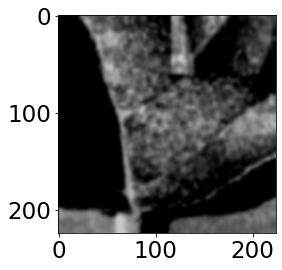

In [61]:
plt.imshow(transforms_ss(x2[1]).cpu().permute(1, 2, 0))

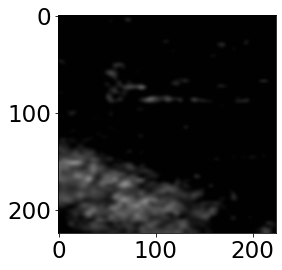

In [60]:
plt.imshow(transforms_ss(x2[0]).cpu().permute(1, 2, 0))

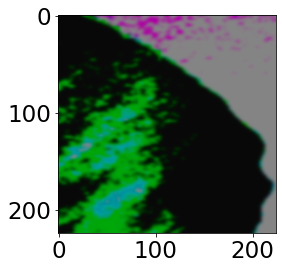

In [59]:
plt.imshow(transforms_ss(x1[0]).cpu().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


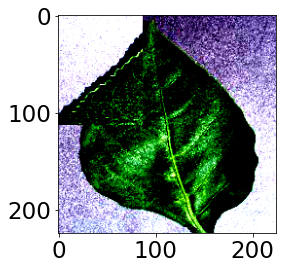

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


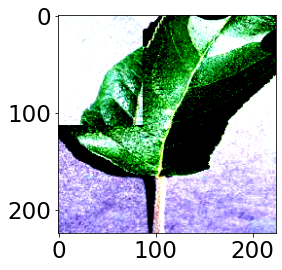

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


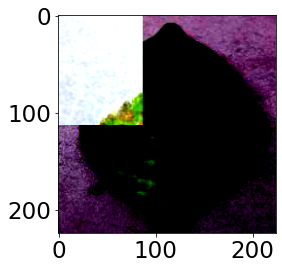

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


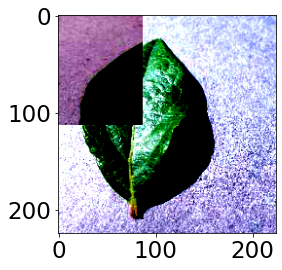

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


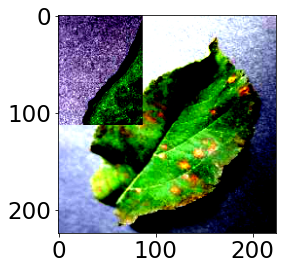

In [34]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_001shot_head_default/cutmix/output/img_33.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

In [15]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_clean_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_clean_0.txt'

In [14]:
test_acc.max(axis=1)

1      0.293333
2      0.320000
3      0.333333
4      0.280000
5      0.306667
         ...   
596    0.346667
597    0.293333
598    0.333333
599    0.293333
600    0.346667
Length: 600, dtype: float64

In [178]:
test_acc.iloc[:,-1]

1      0.226667
2      0.253333
3      0.253333
4      0.226667
5      0.240000
         ...   
596    0.306667
597    0.240000
598    0.293333
599    0.200000
600    0.306667
Name: epoch100, Length: 600, dtype: float64

In [181]:
np.argmax(test_acc.max(axis=1) - test_acc.iloc[:,-1])

158

In [17]:
data = 'crop'
episode = 30 #547

Testing Accuracy of baseline 75.37 ± 0.85


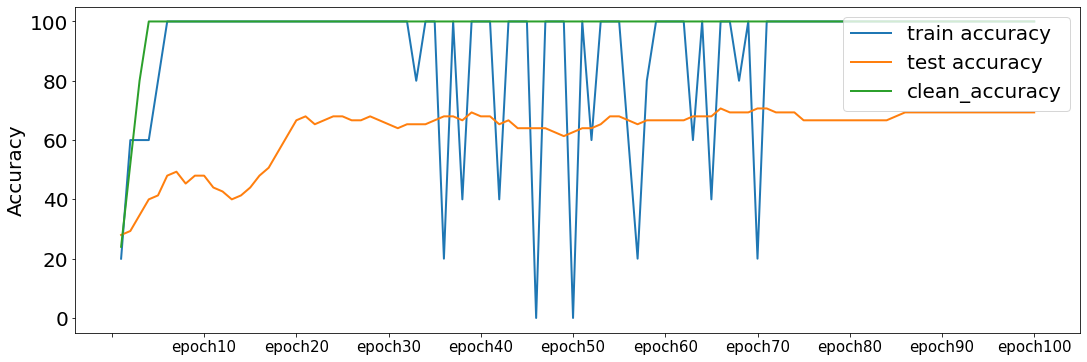

In [18]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
clean_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_005shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.plot(clean_acc.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

Testing Accuracy of baseline 72.71 ± 0.87


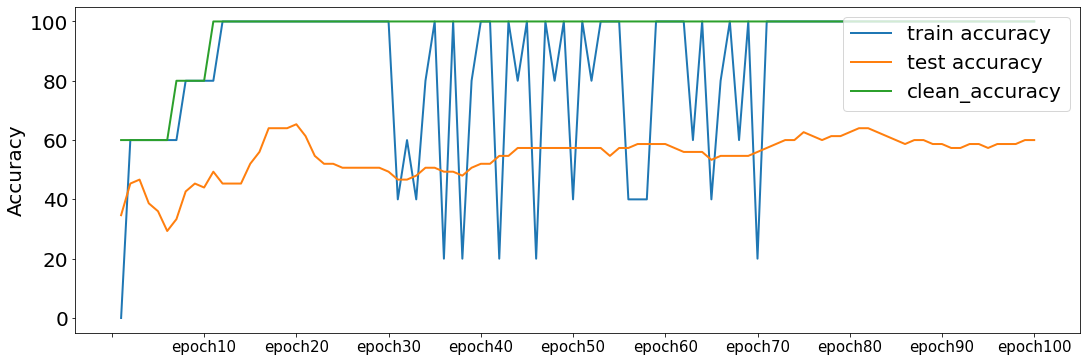

In [298]:
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/train_history_30_70.csv'.format(data), index_col='Unnamed: 0')
clean_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/test_history_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.plot(clean_acc.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [299]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 118 epg: 0.0
0.7599999904632568
0.7599999904632568


Testing Accuracy of baseline 73.12 ± 0.88


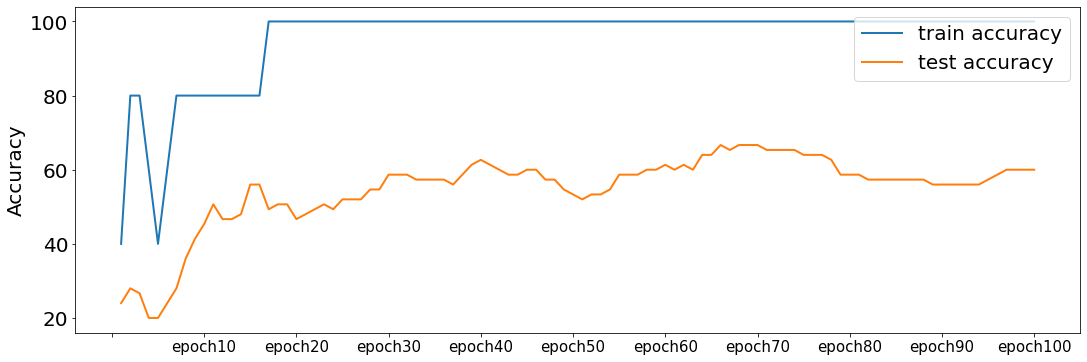

In [300]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
#train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/euro/05way_005shot_head_default/test_clean_history_cutmix_v1.csv', index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
#plt.plot(train_acc_clean.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [295]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 30 epg: 6.666666269302368
0.3733333349227905
0.293333351612091


In [ ]:
path = './logs/baseline/output/resnet10_simclr_LS_default/chest/05way_001shot_full_default/layer_diff.csv'
df = 